# Wind Turbine Power Production
###  Project assessment
#### [Machine Learning and Statistics Module GMIT 2020 ]

---

<img align="left" width="300" src="https://image.flaticon.com/icons/png/512/1778/1778210.png">
<br>

<br>

Lecturer: *Ian McLoughlin (https://github.com/ianmcloughlin)*

Completed by: *Olga Rozhdestvina (G00387844@gmit.ie)*

---

## Table of Contents

* [Overview](#overview)
* [General Setup](#setup)
* [Loading Data](#loading_data)
* [](#)
* [](#)
* [](#)
* [](#)

<br>

### Overview <a name="overview"></a>
___

<br>

### General Setup <a name="setup"></a>
___

In [1]:
# Neural networks.
import tensorflow.keras as kr

# Test/train split
from sklearn.model_selection import train_test_split as tts

# Machine learning - k-NN.
from sklearn.neighbors import KNeighborsRegressor as neigh
# k-NN accurancy checking.
from sklearn.metrics import accuracy_score

# Numerical arrays.
import numpy as np

# Data frames.
import pandas as pd

# Plotting.
import matplotlib.pyplot as plt
# Another package for plotting.
import seaborn as sns

%matplotlib inline

In [2]:
# Theme for plots.
sns.set_theme(palette="Set2", context="paper", font_scale=1.5, )

# Plot size.
plt.rcParams['figure.figsize'] = [14, 8]

<br>

### Loading Data <a name="loading_data"></a>
___

> [1] [Adjusting Size of Seaborn Plot](https://stackoverflow.com/questions/51502927/adjusting-size-of-seaborn-plot)

In [3]:
# Load the iris data set from a URL.
df = pd.read_csv("powerproduction.csv")

# Display the data frame.
df

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


In [4]:
# Check for empty values.
df.isnull().values.any()

False

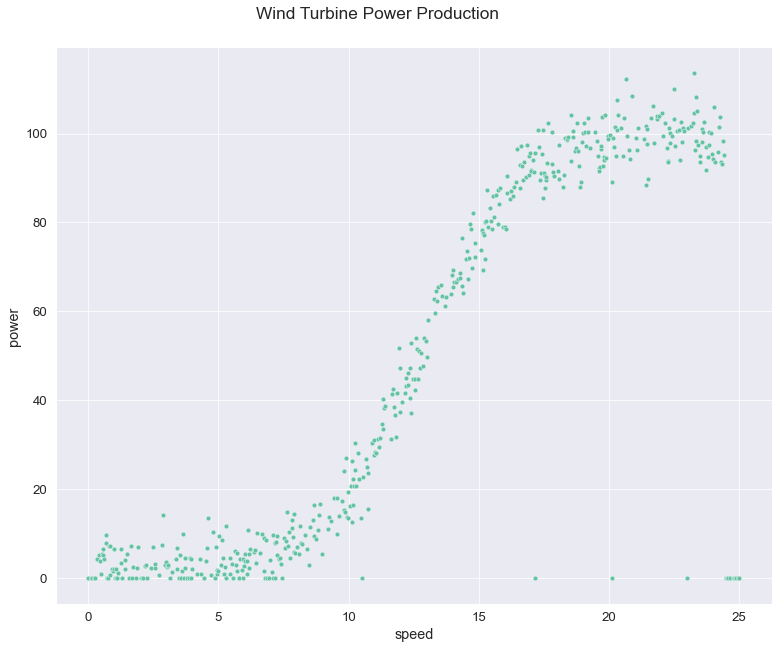

In [5]:
# Plot data.
sns.relplot(data=df, x="speed", y="power")

# Change plot size.
fig = plt.gcf()
fig.set_size_inches(12, 9)
fig.suptitle("Wind Turbine Power Production", y=1.02)

# Show the plot.
plt.show()

The above plot shows that the data follows a non-linear model. The relationship between Power and Speed predominantly take "S"-shape (sigmoid curve). The power rises dramatically with speed over about 8 m/s and slows when the speed reaches about 17 m/s.

Additionally, we can see some outliners where the speed is above 10 m/s, however, the power is still 0. By removing this outliners we can tidy our data set. [2]

> [2] [Delete rows based on multiple conditions; including other column conditionals](https://stackoverflow.com/questions/31997992/delete-rows-based-on-multiple-conditions-including-other-column-conditionals)

In [6]:
df_new = df.drop(df[(df.power == 0) & (df.speed > 10)].index)
df_new

,speed,power
0,0.000,0.000
1,0.125,0.000
2,0.150,0.000
3,0.225,0.000
4,0.275,0.000
...,...,...
485,24.249,103.700
486,24.299,93.694
487,24.349,93.078
488,24.374,98.223


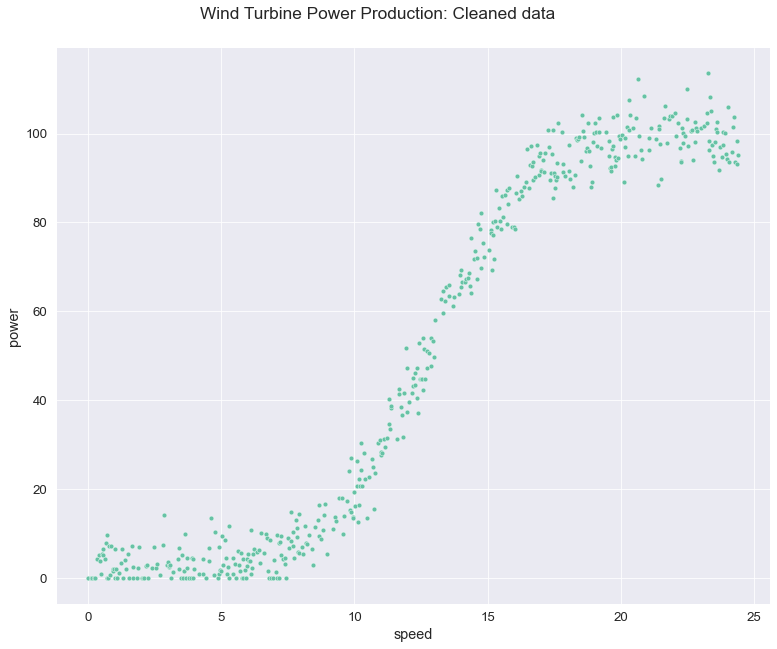

In [7]:
# Plot data.
sns.relplot(data=df_new, x="speed", y="power")

# Change plot size.
fig = plt.gcf()
fig.set_size_inches(12, 9)
fig.suptitle("Wind Turbine Power Production: Cleaned data", y=1.02)

# Show the plot.
plt.show()

<br>

###  k-Nearest Neighbors.
___


In [8]:
# Separate parameters from output.
speed = df_new.iloc[:, 0]
power = df_new.iloc[:,1]

In [9]:
# Select Petal Length and Width (in reverse order so plots look better), convert them into a numpy array.
X = np.array(speed.values).reshape(-1,1)
y = np.array(speed.values)

In [10]:
# Split data on training and test (add random state so the outputs are the same after each execution).
speed_train, speed_test, power_train, power_test = tts(X, y, test_size=0.3, random_state=4)

In [11]:
# Check the shape of tested data.
print(f"Trained data: {speed_train.shape}, {power_train.shape}")
print(f"Tested data: {speed_test.shape}, {power_test.shape}")

Trained data: (340, 1), (340,)
Tested data: (146, 1), (146,)


In [12]:
# Find the highest accuracy and lowest error.

score = []
error_rate = []

# Find optimal k-value from 1-39
for k in range(1, 40):

    # Create an instance of the k-NN and fit data.
    knn = neigh(1)
    knn.fit(speed_train,power_train)
    pred_y = knn.predict(speed_test)


    # Check when predicted output doesn't match real output
    error_rate.append(np.mean(pred_y != power_test))

# Print a k-values with minimum error (+1 as indexing starts at 0 position)
print("Minimum error:",min(error_rate),"at K =",1+error_rate.index(min(error_rate)))

Minimum error: 1.0 at K = 1


<br>

### Neural Networks.
___


In [13]:
# Train a different model.
model = kr.models.Sequential()
model.add(kr.layers.Dense(50, input_shape=(1,), activation='sigmoid', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.add(kr.layers.Dense(1, activation='relu', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.compile("adam", loss='mse')

In [14]:
# Train the neural network on our training data.
model.fit(df_new['speed'], df_new['power'], epochs=400)

Epoch 1/400
16/16 [==============================] - 2s 5ms/step - loss: 4182.0550
Epoch 2/400
16/16 [==============================] - 0s 4ms/step - loss: 3971.1641
Epoch 3/400
16/16 [==============================] - 0s 4ms/step - loss: 3843.6295
Epoch 4/400
16/16 [==============================] - 0s 5ms/step - loss: 3826.4369
Epoch 5/400
16/16 [==============================] - 0s 6ms/step - loss: 3869.1808
Epoch 6/400
16/16 [==============================] - 0s 6ms/step - loss: 3571.0235
Epoch 7/400
16/16 [==============================] - 0s 5ms/step - loss: 3593.3461
Epoch 8/400
16/16 [==============================] - 0s 6ms/step - loss: 3540.5282
Epoch 9/400
16/16 [==============================] - 0s 6ms/step - loss: 3633.0226
Epoch 10/400
16/16 [==============================] - 0s 6ms/step - loss: 3488.9899
Epoch 11/400
16/16 [==============================] - 0s 5ms/step - loss: 3116.6921
Epoch 12/400
16/16 [==============================] - 0s 5ms/step - loss: 3166.3301
E

16/16 [==============================] - 0s 5ms/step - loss: 916.7492
Epoch 99/400
16/16 [==============================] - 0s 5ms/step - loss: 897.7145
Epoch 100/400
16/16 [==============================] - 0s 6ms/step - loss: 871.1255
Epoch 101/400
16/16 [==============================] - 0s 6ms/step - loss: 873.1236
Epoch 102/400
16/16 [==============================] - 0s 6ms/step - loss: 859.2782
Epoch 103/400
16/16 [==============================] - 0s 5ms/step - loss: 874.9707
Epoch 104/400
16/16 [==============================] - 0s 6ms/step - loss: 820.2598
Epoch 105/400
16/16 [==============================] - 0s 5ms/step - loss: 837.2244
Epoch 106/400
16/16 [==============================] - 0s 5ms/step - loss: 787.6896
Epoch 107/400
16/16 [==============================] - 0s 6ms/step - loss: 796.6387
Epoch 108/400
16/16 [==============================] - 0s 6ms/step - loss: 747.3285
Epoch 109/400
16/16 [==============================] - 0s 5ms/step - loss: 807.8930
Epoch 1

16/16 [==============================] - 0s 10ms/step - loss: 201.1372
Epoch 196/400
16/16 [==============================] - 0s 9ms/step - loss: 194.5880
Epoch 197/400
16/16 [==============================] - 0s 8ms/step - loss: 180.4147
Epoch 198/400
16/16 [==============================] - 0s 6ms/step - loss: 184.5706
Epoch 199/400
16/16 [==============================] - 0s 11ms/step - loss: 181.3030
Epoch 200/400
16/16 [==============================] - 0s 6ms/step - loss: 166.4696
Epoch 201/400
16/16 [==============================] - 0s 6ms/step - loss: 175.6345
Epoch 202/400
16/16 [==============================] - 0s 10ms/step - loss: 171.7446
Epoch 203/400
16/16 [==============================] - 0s 7ms/step - loss: 156.5501
Epoch 204/400
16/16 [==============================] - 0s 7ms/step - loss: 166.2401
Epoch 205/400
16/16 [==============================] - 0s 6ms/step - loss: 152.1878
Epoch 206/400
16/16 [==============================] - 0s 6ms/step - loss: 156.8657
Epo

Epoch 292/400
16/16 [==============================] - 0s 5ms/step - loss: 45.1725
Epoch 293/400
16/16 [==============================] - 0s 5ms/step - loss: 42.9551
Epoch 294/400
16/16 [==============================] - 0s 5ms/step - loss: 39.4196
Epoch 295/400
16/16 [==============================] - 0s 5ms/step - loss: 38.7267
Epoch 296/400
16/16 [==============================] - 0s 5ms/step - loss: 37.9649
Epoch 297/400
16/16 [==============================] - 0s 5ms/step - loss: 41.7366
Epoch 298/400
16/16 [==============================] - 0s 6ms/step - loss: 41.4062
Epoch 299/400
16/16 [==============================] - 0s 4ms/step - loss: 40.4821
Epoch 300/400
16/16 [==============================] - 0s 5ms/step - loss: 42.2446
Epoch 301/400
16/16 [==============================] - 0s 6ms/step - loss: 43.0465
Epoch 302/400
16/16 [==============================] - 0s 4ms/step - loss: 42.1963
Epoch 303/400
16/16 [==============================] - 0s 6ms/step - loss: 37.7002
Epoc

16/16 [==============================] - 0s 5ms/step - loss: 29.4098
Epoch 391/400
16/16 [==============================] - 0s 6ms/step - loss: 28.2139
Epoch 392/400
16/16 [==============================] - 0s 6ms/step - loss: 31.7644
Epoch 393/400
16/16 [==============================] - 0s 5ms/step - loss: 28.2103
Epoch 394/400
16/16 [==============================] - 0s 5ms/step - loss: 30.8601
Epoch 395/400
16/16 [==============================] - 0s 5ms/step - loss: 30.5898
Epoch 396/400
16/16 [==============================] - 0s 5ms/step - loss: 30.5933
Epoch 397/400
16/16 [==============================] - ETA: 0s - loss: 30.96 - 0s 5ms/step - loss: 30.6529
Epoch 398/400
16/16 [==============================] - 0s 5ms/step - loss: 26.9373
Epoch 399/400
16/16 [==============================] - ETA: 0s - loss: 29.11 - 0s 4ms/step - loss: 29.2131
Epoch 400/400
16/16 [==============================] - 0s 4ms/step - loss: 27.4999


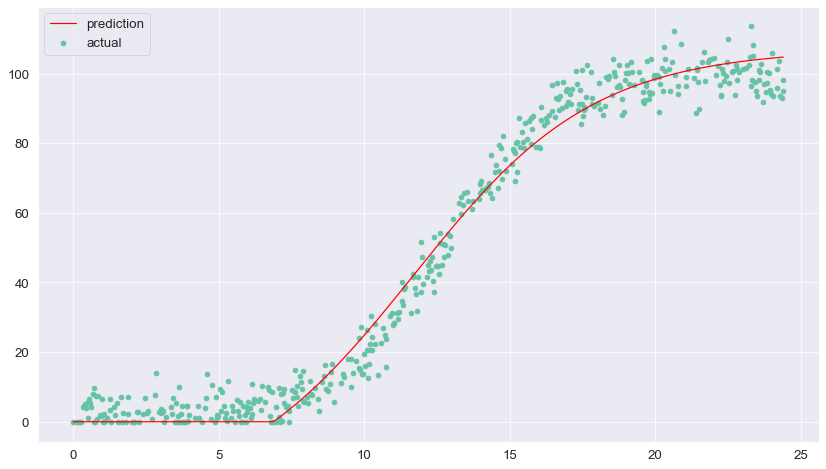

In [15]:

# Now let's see.
plt.scatter(df_new['speed'], df_new['power'], label='actual')
plt.plot(df_new['speed'], model.predict(df_new['speed']), label='prediction', c="r")
plt.legend()
plt.show()